# Radial Profiles

In [1]:
#for using custom PyPPM for development:
import sys
sys.path.insert(0, '/home/user/PyPPM/')

%pylab nbagg
from ppmpy import ppm

from nugridpy import mesa as ms
import nugridpy.astronomy as ast
from nugridpy.utils import colourblind as cb

import numpy as np
import matplotlib.pyplot as pl
import os

data_dir = '/data/ppm_rpod2/YProfiles'

Populating the interactive namespace from numpy and matplotlib


In [2]:
!ls /data/ppm_rpod2/YProfiles/
project = 'AGBTP_M2.0Z1.e-5'

AGBTP_M2.0Z1.e-5  O-shell-M25	  agb-entrainment-convergence
C-ingestion	  O-shell-mixing  sakurai
M4ZAMS		  RAWD		  sakurai-num-exp-robustness-onset-GOSH


In [3]:
ppm.set_YProf_path(os.path.join(data_dir,project))
ppm.cases

['F6', 'F7', 'F11', 'F4', 'F5']

<IPython.core.display.Javascript object>


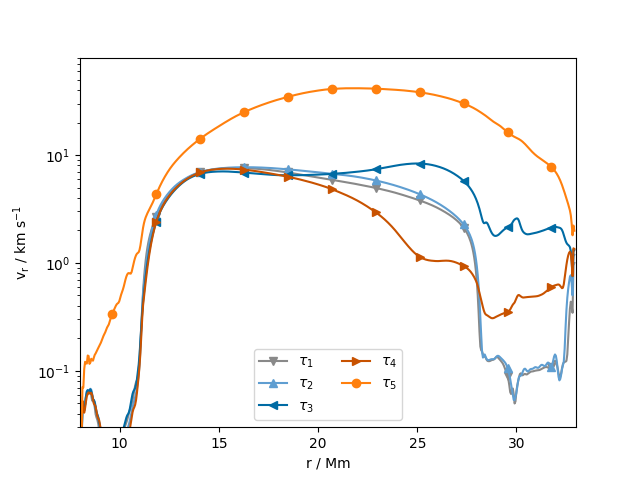

In [4]:
fname = [560, 970, 1469, 1630, 1909]
F4 = ppm.yprofile('F4')
F4.vprof_time(fname,11,comp = 'r',lims=[8., 33.,3e-2, 8e1],save=False,
                   initial_conv_boundaries=False,lw=1., ifig = 5)

<IPython.core.display.Javascript object>


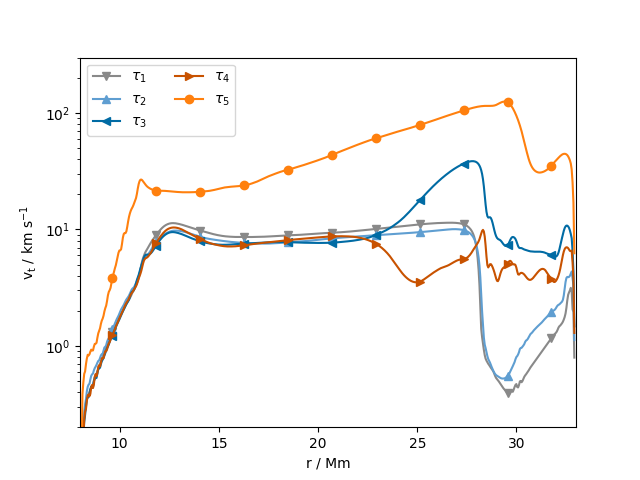

In [5]:
F4.vprof_time(fname,11,comp = 't',lims=[8., 33.,2e-1, 3e2],save=False,
                   initial_conv_boundaries=False,lw=1., ifig = 6)

<IPython.core.display.Javascript object>


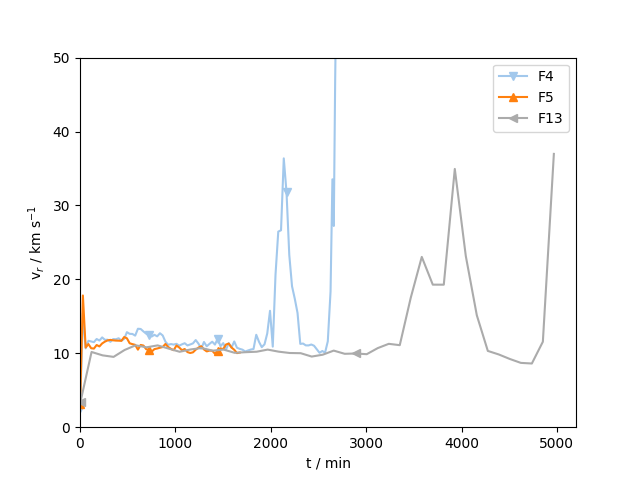

p


In [6]:
ppm.v_evolution(['F4','F5','F13'],11.5, 28.5,'tot','max',
            sparse = 20, ifig = 7,dumps=[0,2000], lims = [0., 5.2e3,0., 50.])

<IPython.core.display.Javascript object>


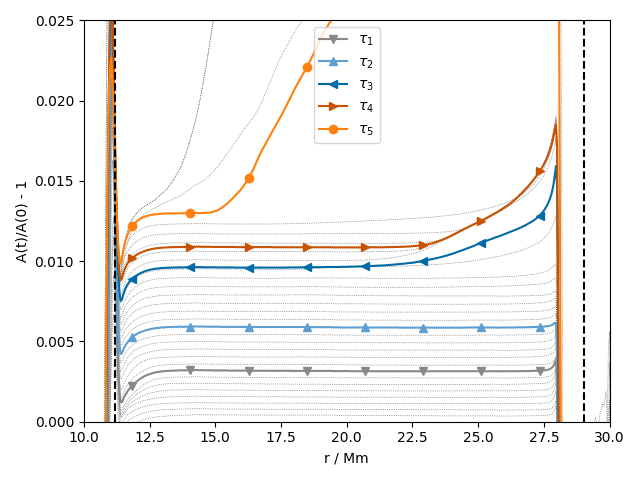

The closest time is at Ndump = 559
The closest time is at Ndump = 970
The closest time is at Ndump = 1469
The closest time is at Ndump = 1630
The closest time is at Ndump = 1908


In [7]:
F4.Aprof_time(np.array([807., 1399., 2119., 2351., 2695.]),range(0,30,1),lims =[10., 30.,0., 2.5e-2],silent = True)

In [8]:
!ls /data/ppm_rpod2/Stellar_models/

AGBTP_M2.0Z1.e-5  CBM_M25  M15Z0.02  O-shell-M25  PopIII  Sakurai


In [9]:
YProfile_path = os.path.join(data_dir)
ppm.set_YProf_path(YProfile_path)

In [10]:
data_dir = '/data/ppm_rpod2/'
mesa_logs_path = 'Stellar_models/AGBTP_M2.0Z1.e-5/M2.00Z1.e-5/LOGS'
mesa_model_num = 24150

In [11]:
mesa_prof = ms.mesa_profile(data_dir + mesa_logs_path, mesa_model_num)
# convert the mesa variables to cgs units
mesa_r = ast.rsun_cm*mesa_prof.get('radius')
mesa_p = 10**mesa_prof.get('logP')
mesa_rho = 10**mesa_prof.get('logRho')
mesa_mu = mesa_prof.get('mu')
mesa_T = 10**mesa_prof.get('logT')

# get the PPM models in cgs units
F4_prof = ppm.yprofile('AGBTP_M2.0Z1.e-5/F4')
F4_r = 1e8*F4_prof.get('Y', fname = 0, resolution = 'l')
F4_p = 1e19*F4_prof.get('P', fname = 0, resolution = 'l')
F4_rho = 1e3*F4_prof.get('Rho', fname = 0, resolution = 'l')
F4_FV = F4_prof.get('FV H+He', fname = 0, resolution = 'l')
F4_airmu = 1.39165
F4_cldmu = 0.725
F4_mu = F4_prof.get('mu', fname = 0, resolution = 'l',
                       airmu=F4_airmu, cldmu=F4_cldmu)
F4_T = 1e9*F4_prof.get('T9', fname = 0, resolution = 'l',
                       airmu=F4_airmu, cldmu=F4_cldmu)

# cut out the physical domain
F4_r_bot = 8e8
F4_r_top = 33e8
F4_idx_bot = np.argmin(np.abs(F4_r - F4_r_bot))
F4_idx_top = np.argmin(np.abs(F4_r - F4_r_top))
F4_r = F4_r[F4_idx_top:F4_idx_bot]
F4_p = F4_p[F4_idx_top:F4_idx_bot]
F4_rho = F4_rho[F4_idx_top:F4_idx_bot]
F4_mu = F4_mu[F4_idx_top:F4_idx_bot]
F4_T = F4_T[F4_idx_top:F4_idx_bot]

G2_prof = ppm.yprofile('sakurai/G2/')
G2_r = 1e8*G2_prof.get('Y', fname = 0, resolution = 'l')
G2_p = 1e19*G2_prof.get('P', fname = 0, resolution = 'l')
G2_rho = 1e3*G2_prof.get('Rho', fname = 0, resolution = 'l')
G2_FV = G2_prof.get('FV H+He', fname = 0, resolution = 'l')
G2_airmu = 1.53796859981
G2_cldmu = 0.634920634921
G2_mu = G2_prof.get('mu', fname = 0, resolution = 'l', \
                       airmu=G2_airmu, cldmu=G2_cldmu)
G2_T = 1e9*G2_prof.get('T9', fname = 0, resolution = 'l', \
                       airmu=G2_airmu, cldmu=G2_cldmu)

# cut out the physical domain
G2_r_bot = 7e8
G2_r_top = 22e8
G2_idx_bot = np.argmin(np.abs(G2_r - G2_r_bot))
G2_idx_top = np.argmin(np.abs(G2_r - G2_r_top))
G2_r = G2_r[G2_idx_top:G2_idx_bot]
G2_p = G2_p[G2_idx_top:G2_idx_bot]
G2_rho = G2_rho[G2_idx_top:G2_idx_bot]
G2_mu = G2_mu[G2_idx_top:G2_idx_bot]
G2_T = G2_T[G2_idx_top:G2_idx_bot]

983 in profiles.index file ...
Found and load nearest profile for cycle 24150
reading /data/ppm_rpod2/Stellar_models/AGBTP_M2.0Z1.e-5/M2.00Z1.e-5/LOGS/log787.data ...
 reading ...100% 



<IPython.core.display.Javascript object>


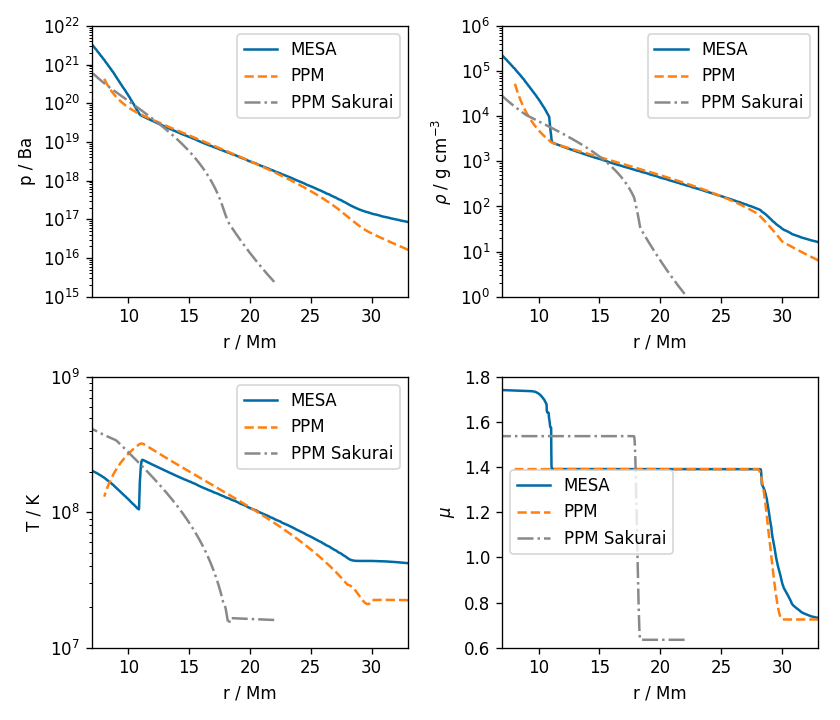

In [12]:
ifig = 1; pl.close(ifig); fig = pl.figure(ifig, figsize=(7., 6.), dpi=120)

xlim = (G2_r_bot/1e8, F4_r_top/1e8)

ax1 = fig.add_subplot(221)
ax1.semilogy(mesa_r/1e8, mesa_p, ls = '-', color = cb(5), label = "MESA")
ax1.semilogy(F4_r/1e8, F4_p, ls = '--', color = cb(1), label = "PPM")
ax1.semilogy(G2_r/1e8, G2_p, ls = '-.', color = cb(9), label = "PPM Sakurai")
ax1.set_xlim(xlim)
ax1.set_ylim((1e15, 1e22))
ax1.set_xlabel('r / Mm')
ax1.set_ylabel('p / Ba')
ax1.legend(loc = 0)

ax2 = fig.add_subplot(222)
ax2.semilogy(mesa_r/1e8, mesa_rho, ls = '-', color = cb(5), label = "MESA")
ax2.semilogy(F4_r/1e8, F4_rho, ls = '--', color = cb(1), label = "PPM")
ax2.semilogy(G2_r/1e8, G2_rho, ls = '-.', color = cb(9), label = "PPM Sakurai")
ax2.set_xlim(xlim)
ax2.set_ylim((1e0, 1e6))
ax2.set_xlabel('r / Mm')
ax2.set_ylabel(r'$\rho$ / g cm$^{-3}$')
ax2.legend(loc = 0)

ax3 = fig.add_subplot(223)
ax3.semilogy(mesa_r/1e8, mesa_T, ls = '-', color = cb(5), label = "MESA")
ax3.semilogy(F4_r/1e8, F4_T, ls = '--', color = cb(1), label = "PPM")
ax3.semilogy(G2_r/1e8, G2_T, ls = '-.', color = cb(9), label = "PPM Sakurai")
ax3.set_xlim(xlim)
ax3.set_ylim((1e7, 1e9))
ax3.set_xlabel('r / Mm')
ax3.set_ylabel('T / K')
ax3.legend(loc = 0)

ax4 = fig.add_subplot(224)
ax4.plot(mesa_r/1e8, mesa_mu, ls = '-', color = cb(5), label = "MESA")
ax4.plot(F4_r/1e8, F4_mu, ls = '--', color = cb(1), label = "PPM")
ax4.plot(G2_r/1e8, G2_mu, ls = '-.', color = cb(9), label = "PPM Sakurai")
ax4.set_xlim(xlim)
ax4.set_ylim((0.6, 1.8))
ax4.set_xlabel('r / Mm')
ax4.set_ylabel(r'$\mu$')
ax4.legend(loc = 0)

fig.tight_layout()